The plot method on Series and DataFrame is just a simple wrapper around plt.plot()

If the index consists of dates, it calls gcf().autofmt_xdate() to try to format the x-axis nicely as show in the plot window.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

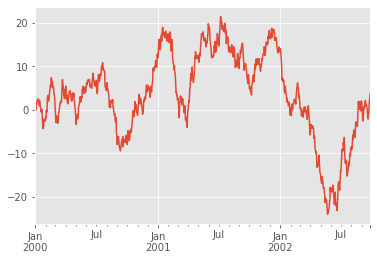

In [2]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()
plt.show()   

On DataFrame, plot() is a convenience to plot all of the columns, and include a legend within the plot.

<Figure size 432x288 with 0 Axes>

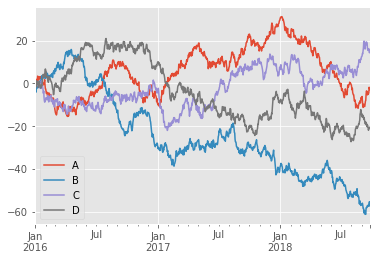

In [3]:
df = pd.DataFrame(np.random.randn(1000, 4), index=pd.date_range('1/1/2016', periods=1000), columns=list('ABCD'))
df = df.cumsum()
plt.figure()
df.plot()
plt.show()

You can plot one column versus another using the x and y keywords in plot():

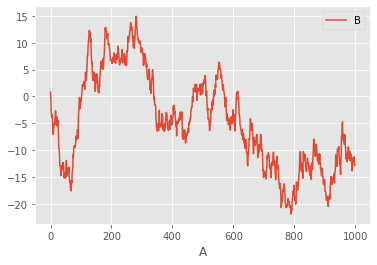

In [4]:
df3 = pd.DataFrame(np.random.randn(1000, 2), columns=['B', 'C']).cumsum()
df3['A'] = pd.Series(list(range(len(df))))
df3.plot(x='A', y='B')
plt.show()

In [5]:
df3.tail()

,B,C,A
995,-24.139506,40.558069,995
996,-24.483647,41.802583,996
997,-23.673174,42.011615,997
998,-24.966489,43.178417,998
999,-24.779655,42.718522,999


### Plots other than line plots
Plotting methods allow for a handful of plot styles other than the default Line plot. These methods can be provided as the kind keyword argument to plot(). These include:

- ‘bar’ or ‘barh’ for bar plots
- ‘hist’ for histogram
- ‘box’ for boxplot
- ‘kde’ or 'density' for density plots
- ‘area’ for area plots
- ‘scatter’ for scatter plots
- ‘hexbin’ for hexagonal bin plots
- ‘pie’ for pie plots

For example, a bar plot can be created the following way:

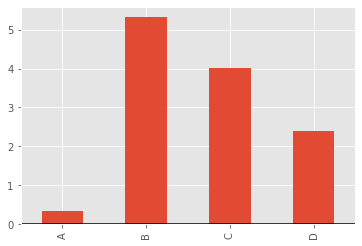

In [6]:
plt.figure()
df.iloc[5].plot(kind='bar')
plt.axhline(0, color='k')
plt.show()

In [8]:
df.iloc[5]

A    0.344041
B    5.325822
C    4.006982
D    2.391996
Name: 2016-01-06 00:00:00, dtype: float64

### stack bar chart

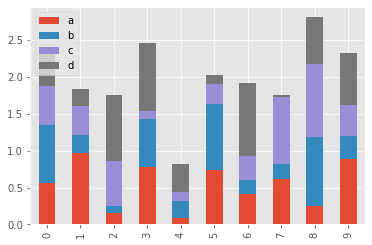

In [9]:
df2 = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])
df2.plot.bar(stacked=True)
plt.show()

### horizontal bar chart

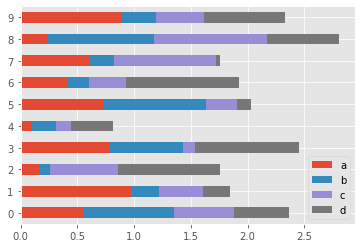

In [10]:
df2.plot.barh(stacked=True)
plt.show()

### box plot

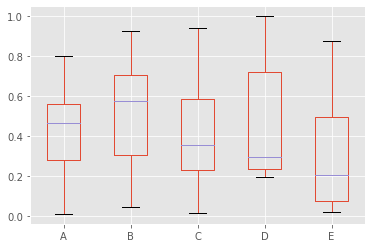

In [11]:
df = pd.DataFrame(np.random.rand(10, 5), columns=['A', 'B', 'C', 'D', 'E'])
df.plot.box()
plt.show()

### area plot

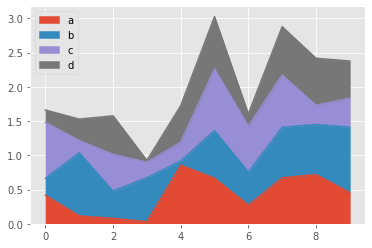

In [12]:
df = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])
df.plot.area()
plt.show()

### Plotting with Missing Data
Pandas tries to be pragmatic about plotting DataFrames or Series that contain missing data. Missing values are dropped, left out, or filled depending on the plot type.

| Plot Type      | NaN Handling            |   |
|----------------|-------------------------|---|
| Line           | Leave gaps at NaNs      |   |
| Line (stacked) | Fill 0’s                |   |
| Bar            | Fill 0’s                |   |
| Scatter        | Drop NaNs               |   |
| Histogram      | Drop NaNs (column-wise) |   |
| Box            | Drop NaNs (column-wise) |   |
| Area           | Fill 0’s                |   |
| KDE            | Drop NaNs (column-wise) |   |
| Hexbin         | Drop NaNs               |   |
| Pie            | Fill 0’s                |   |

If any of these defaults are not what you want, or if you want to be explicit about how missing values are handled, consider using fillna() or dropna() before plotting.

### density plot

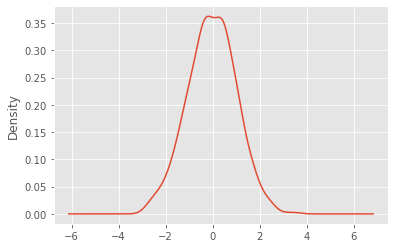

In [13]:
ser = pd.Series(np.random.randn(1000))
ser.plot.kde()
plt.show()

### lag plot
Lag plots are used to check if a data set or time series is random. Random data should not exhibit any structure in the lag plot. Non-random structure implies that the underlying data are not random.

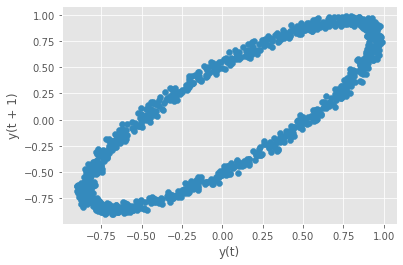

In [15]:
from pandas.plotting import lag_plot
plt.figure()
data = pd.Series(0.1 * np.random.rand(1000) + 0.9 * np.sin(np.linspace(-99 * np.pi, 99 * np.pi, num=1000)))
lag_plot(data)
plt.show()

### matplotlib gallery
documentation: http://matplotlib.org/gallery.html